In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (454).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (365).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (585).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (1171).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (1181).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (739).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (1151).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (399).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (914).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/Corn_Common_Rust (283).JPG
/kaggle/input/corn-or-maize-leaf-disease-dataset/data/Common_Rust/C

## importing libraries

To begin with, we need to import several libraries to enable us to perform various tasks related to data visualization, image processing, and machine learning.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from PIL import Image
from sklearn.model_selection import train_test_split

##  Loading the Dataset:

In [4]:
root="/kaggle/input/corn-or-maize-leaf-disease-dataset/data"
categories=os.listdir(root)
categories

['Common_Rust', 'Blight', 'Healthy', 'Gray_Leaf_Spot']

## Creating Image and Label Lists

In [5]:
images = []
labels = []
for category in categories:
    directory = root +"/" + category + '/'
    for image_file in os.listdir(directory):
        images.append(directory + image_file)
        labels.append(category)

## Creating a DataFrame



In [6]:
images = pd.Series(images, name="Image")
labels = pd.Series(labels, name="Quality")
data=pd.concat([images,labels], axis=1)
data.head()

,Image,Quality
0,/kaggle/input/corn-or-maize-leaf-disease-datas...,Common_Rust
1,/kaggle/input/corn-or-maize-leaf-disease-datas...,Common_Rust
2,/kaggle/input/corn-or-maize-leaf-disease-datas...,Common_Rust
3,/kaggle/input/corn-or-maize-leaf-disease-datas...,Common_Rust
4,/kaggle/input/corn-or-maize-leaf-disease-datas...,Common_Rust


## Shuffling the DataFrame**

In [7]:
data=data.sample(frac=1).reset_index(drop = True)
data.head()

,Image,Quality
0,/kaggle/input/corn-or-maize-leaf-disease-datas...,Healthy
1,/kaggle/input/corn-or-maize-leaf-disease-datas...,Healthy
2,/kaggle/input/corn-or-maize-leaf-disease-datas...,Healthy
3,/kaggle/input/corn-or-maize-leaf-disease-datas...,Gray_Leaf_Spot
4,/kaggle/input/corn-or-maize-leaf-disease-datas...,Gray_Leaf_Spot


## Displaying Random Images

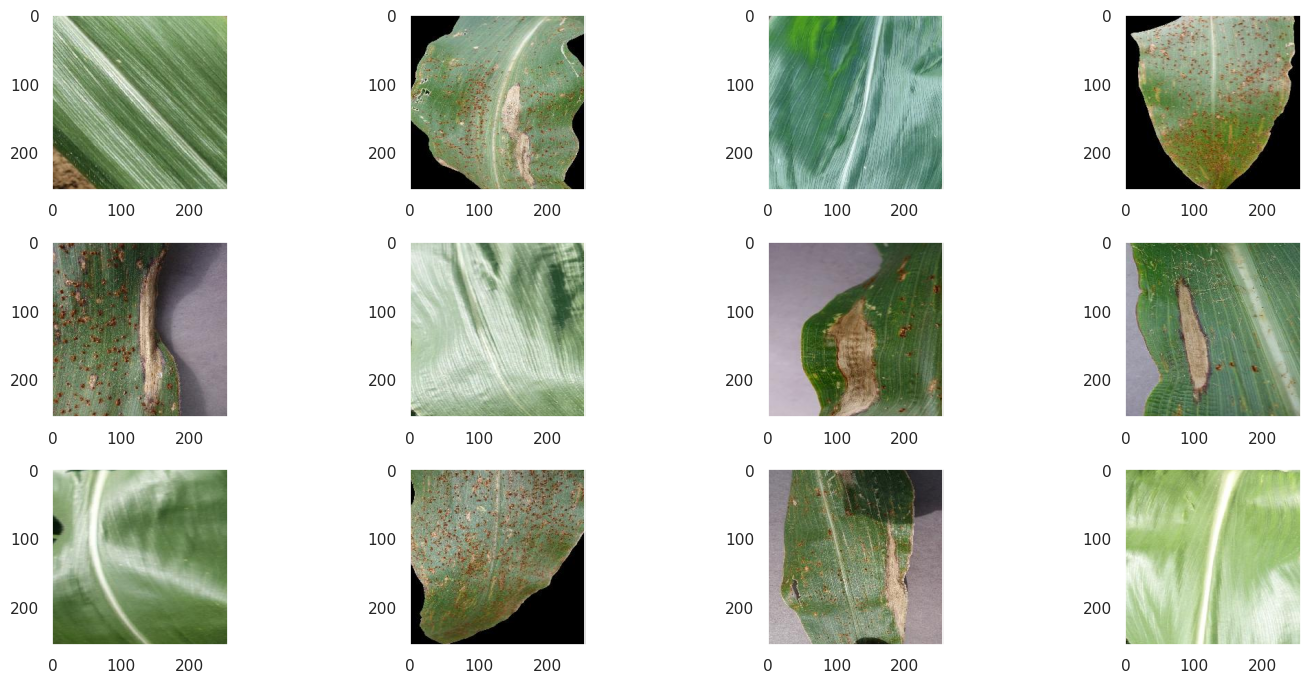

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(15, 7))

for ax in axes.flat:
    i = np.random.randint(0, data.shape[0])
    ax.imshow(Image.open(data.loc[i, "Image"]))
    ax.grid(False)  
    
plt.tight_layout()
plt.show()

##  Train-Test Split:

In [9]:
dev, held_out =train_test_split(
    data, 
    train_size=0.9, 
    shuffle=True,
    random_state=42)
# Printing Shape Information:

print(dev.shape)
print(held_out.shape)

(3769, 2)
(419, 2)


## Data Preprocessing and Image Data Generators

In [11]:
import keras
from keras.preprocessing import image

## Rescaling,Data Augmentation and rescaling

In [12]:
# Rescaling and Data Augmentation
dev_generator = image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)


# In this case, the generator performs rescaling (normalization) on the image.
# Each pixel value is divided by 255 to obtain values in the range [0, 1].
held_generator = image.ImageDataGenerator(rescale=1./255)

##  Flow from DataFrame:

In [13]:
train_images = dev_generator.flow_from_dataframe(
    dataframe=dev,  # Make sure to provide the correct DataFrame
    x_col='Image',  # Update to the correct column name for images
    y_col='Quality',  # Update to the correct column name for labels
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 3016 validated image filenames belonging to 4 classes.


In [14]:
val_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='Quality',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 753 validated image filenames belonging to 4 classes.



## Flow from DataFrame for Testing

In [15]:
held_images = held_generator.flow_from_dataframe(
    dataframe=held_out,
    x_col='Image',
    y_col='Quality',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 419 validated image filenames belonging to 4 classes.


In [16]:
labels = train_images.class_indices
labels

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

## VGG19 Fine-tuning
`This code demonstrates how to perform fine-tuning using the VGG19 model. The VGG16 model is a deep convolutional neural network that has been pre-trained on the ImageNet dataset. Fine-tuning involves taking the pre-trained model and adapting it to a new task or dataset by training the top layers while keeping the lower layers frozen.`

In [36]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop

Load the pre-trained VGG19 model:

The VGG16 class from keras.applications is used to load the pre-trained VGG19 model without the top layer.

The weights parameter is set to 'imagenet' to load the weights trained on ImageNet.

The include_top parameter is set to False to exclude the fully connected layers at the top of the network.

The input_shape parameter is set to (150, 150, 3) to match the expected input size.

In [37]:
# Load the pre-trained VGG16 model without the top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

80134624/80134624 [==============================] - 0s 0us/step


## Freeze the layers in the base model:

The layers in the base model are iterated through, and their trainable attribute is set to False. 
This freezes the weights of the layers so that they are not updated during training.

## Add custom top layers:

A series of fully connected and dropout layers are added on top of the base model to learn task-specific features.
The Flatten layer is used to flatten the output of the base model.
Two Dense layers with 4096 units and ReLU activation are added, along with Dropout layers with a dropout rate of 0.5 to prevent overfitting.
The final Dense layer with 3 units and softmax activation is added to generate the predictions for the three classes.

## Create the fine-tuned model:

The Model class from keras.models is used to create the fine-tuned model, specifying the inputs and outputs.
The input is set to the input of the base model, and the output is set to the predictions generated by the custom top layers.

In [38]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

## Compile the model:
The model is compiled using the RMSprop optimizer with a learning rate of 0.0001.
The loss function is set to 'categorical_crossentropy', and the accuracy metric is used for evaluation.

In [39]:
# Define optimizer
optimizer = RMSprop(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

## Train the model:
The model is trained using the fit method.
The training data (train_images) and validation data (val_images) are provided. 

In [41]:
# Train the model
history = model.fit(train_images, validation_data=val_images,epochs=25)

Epoch 1/25
95/95 [==============================] - 36s 375ms/step - loss: 0.9648 - accuracy: 0.6794 - val_loss: 0.5031 - val_accuracy: 0.8114
Epoch 2/25
95/95 [==============================] - 29s 309ms/step - loss: 0.5744 - accuracy: 0.7812 - val_loss: 0.6136 - val_accuracy: 0.8061
Epoch 3/25
95/95 [==============================] - 29s 308ms/step - loss: 0.5295 - accuracy: 0.8077 - val_loss: 0.4258 - val_accuracy: 0.8526
Epoch 4/25
95/95 [==============================] - 30s 314ms/step - loss: 0.4981 - accuracy: 0.8156 - val_loss: 0.4410 - val_accuracy: 0.8459
Epoch 5/25
95/95 [==============================] - 31s 325ms/step - loss: 0.5013 - accuracy: 0.8216 - val_loss: 0.3852 - val_accuracy: 0.8738
Epoch 6/25
95/95 [==============================] - 30s 318ms/step - loss: 0.4565 - accuracy: 0.8336 - val_loss: 0.5261 - val_accuracy: 0.8446
Epoch 7/25
95/95 [==============================] - 30s 316ms/step - loss: 0.4412 - accuracy: 0.8326 - val_loss: 0.4782 - val_accuracy: 0.8486

## plotting the graph  

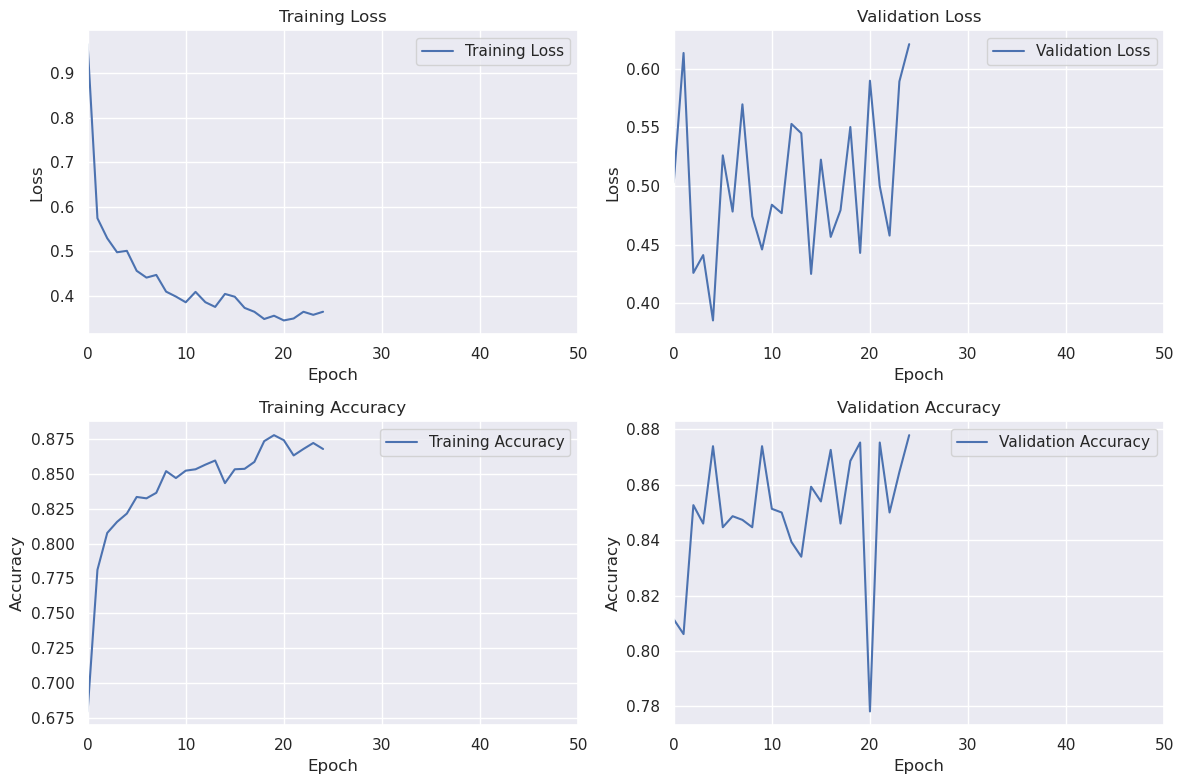

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot training loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xlim([0, 50])  # Set x-axis limits

# Plot validation loss
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xlim([0, 50])  # Set x-axis limits

# Plot training accuracy
axes[1, 0].plot(history.history['accuracy'], label='Training Accuracy')
axes[1, 0].set_title('Training Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xlim([0, 50])  # Set x-axis limits

# Plot validation accuracy
axes[1, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xlim([0, 50])  # Set x-axis limits

plt.tight_layout()
plt.show()

## model prediction and evaluation 

In [43]:
prediction=model.predict(held_images)

14/14 [==============================] - 2s 104ms/step


In [44]:
prediction=np.argmax(prediction, axis=1)
prediction.shape

(419,)

In [45]:
labels = train_images.class_indices
labels = {v: k for k, v in labels.items()}

In [46]:
y_prediction = [labels.get(k) for k in prediction]
y_test = held_out["Quality"].values

##  accuracy evaluation

In [47]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_prediction))

                precision    recall  f1-score   support

        Blight       0.80      0.83      0.82       115
   Common_Rust       0.98      0.95      0.97       134
Gray_Leaf_Spot       0.60      0.69      0.64        51
       Healthy       0.99      0.93      0.96       119

      accuracy                           0.88       419
     macro avg       0.84      0.85      0.85       419
  weighted avg       0.89      0.88      0.88       419



In [48]:
accuracy_score(y_prediction, y_test)

0.8806682577565632

## confusion matrix 

In [49]:

from sklearn.metrics import confusion_matrix

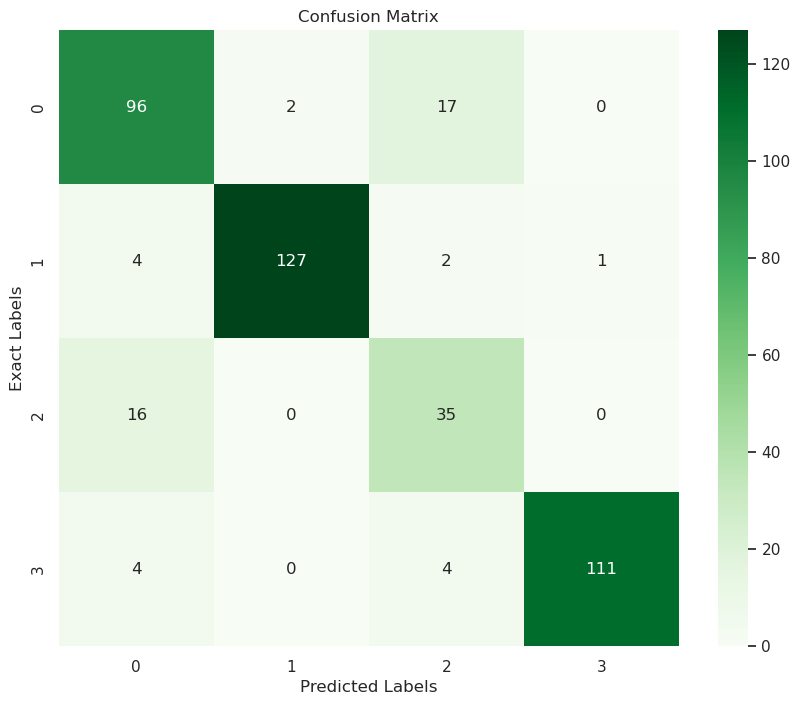

In [50]:
cm = confusion_matrix(y_test, y_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()

## Visualizing Predicted Labels on Random Images

In [51]:
held_out.reset_index(drop=True, inplace=True)
held_out.head()

,Image,Quality
0,/kaggle/input/corn-or-maize-leaf-disease-datas...,Healthy
1,/kaggle/input/corn-or-maize-leaf-disease-datas...,Blight
2,/kaggle/input/corn-or-maize-leaf-disease-datas...,Gray_Leaf_Spot
3,/kaggle/input/corn-or-maize-leaf-disease-datas...,Blight
4,/kaggle/input/corn-or-maize-leaf-disease-datas...,Blight


In [52]:
random_index = np.random.randint(0, held_out.shape[0])
image_path = held_out.loc[random_index, "Image"]
predicted_label = y_prediction[random_index]

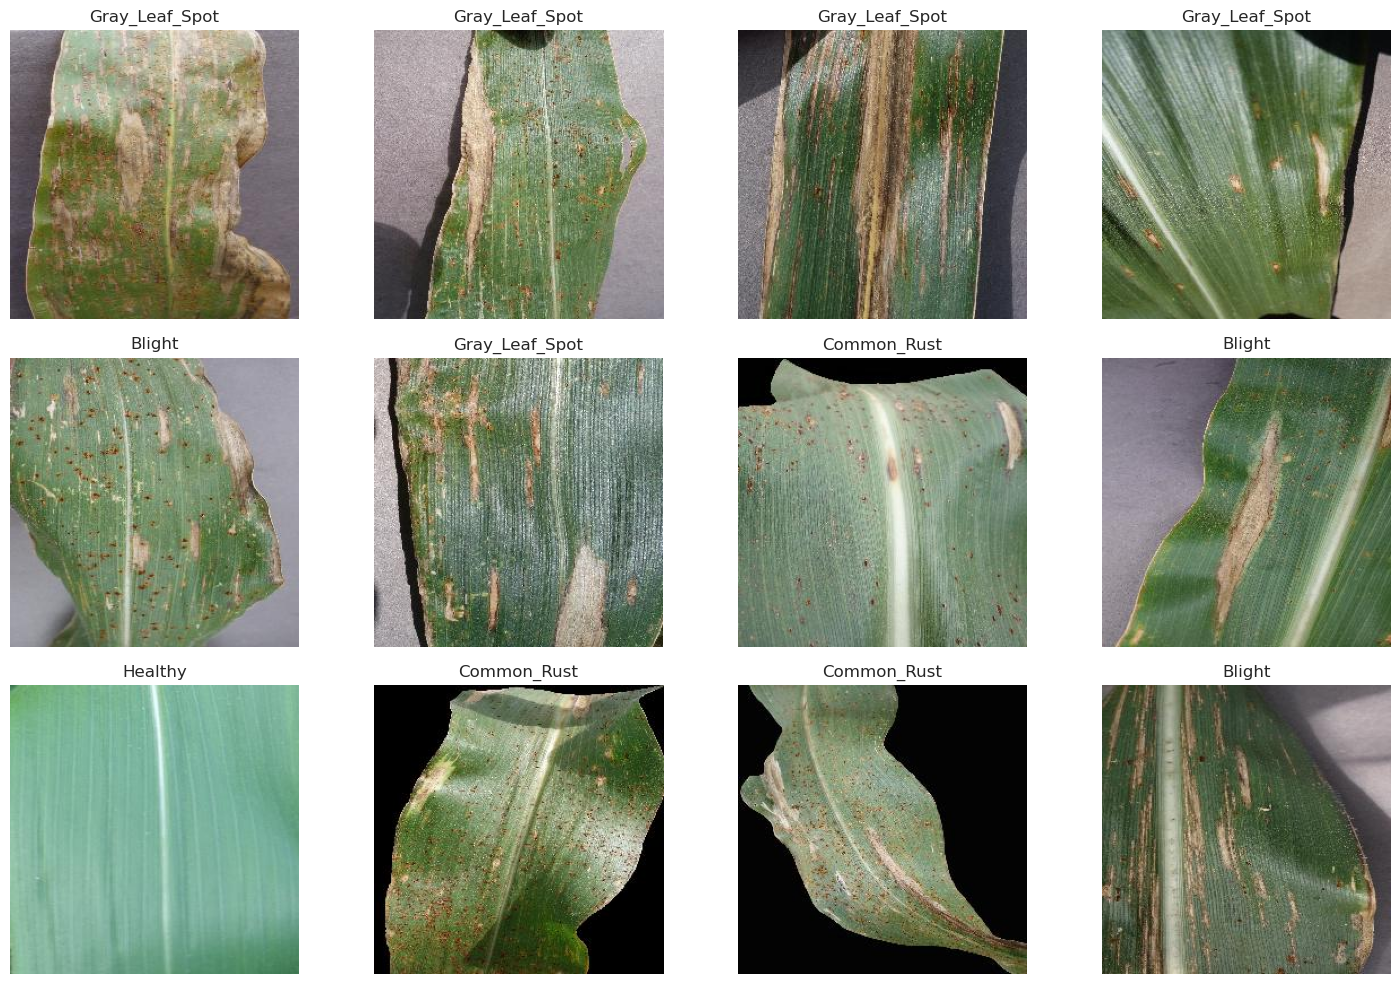

In [53]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Iterate over the axes and randomly select 12 indices
for i, ax in enumerate(axes.flatten()):
    random_index = np.random.randint(0, held_out.shape[0])
    image_path = held_out.loc[random_index, "Image"]
    predicted_label = y_prediction[random_index]

    # Plot the image on the current subplot
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(predicted_label)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()